In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [123]:
df = pd.read_csv('stocks.csv')

In [124]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
...,...,...,...,...,...,...,...
264,2022-08-16,62.650002,67.449997,62.500000,64.250000,64.250000,250686966
265,2022-08-17,64.800003,65.599998,61.799999,65.250000,65.250000,258066522
266,2022-08-18,65.599998,69.250000,65.000000,67.099998,67.099998,303566868
267,2022-08-19,67.400002,68.250000,60.150002,61.450001,61.450001,295737752


In [125]:
df = df[['Date','Close']]

In [126]:
df

,Date,Close
0,2021-07-23,126.000000
1,2021-07-26,140.649994
2,2021-07-27,132.899994
3,2021-07-28,131.199997
4,2021-07-29,141.550003
...,...,...
264,2022-08-16,64.250000
265,2022-08-17,65.250000
266,2022-08-18,67.099998
267,2022-08-19,61.450001


In [127]:
def time(s):
  split = s.split('-')
  year,month,day = int(split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year=year,month=month,day=day)

datetime_obj = time('2021-07-23')

In [128]:
datetime_obj

datetime.datetime(2021, 7, 23, 0, 0)

In [129]:
df['Date'] = df['Date'].apply(time)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
df['Date']

0     2021-07-23
1     2021-07-26
2     2021-07-27
3     2021-07-28
4     2021-07-29
         ...    
264   2022-08-16
265   2022-08-17
266   2022-08-18
267   2022-08-19
268   2022-08-22
Name: Date, Length: 269, dtype: datetime64[ns]

In [131]:
df.index = df.pop('Date')

In [132]:
df

,Close
Date,
2021-07-23,126.000000
2021-07-26,140.649994
2021-07-27,132.899994
2021-07-28,131.199997
2021-07-29,141.550003
...,...
2022-08-16,64.250000
2022-08-17,65.250000
2022-08-18,67.099998


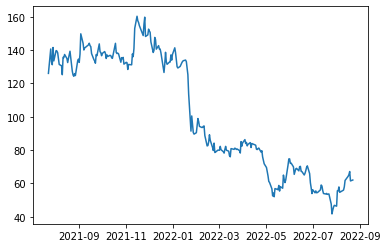

In [133]:
plt.plot(df.index,df['Close'])

In [134]:
def window(dataframe, first_date_str, last_date_str, n=3):
  first_date = time(first_date_str)
  last_date  = time(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-07-23'
windowed_df = window(df, 
                                '2021-08-23', 
                                '2022-08-22', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-08-23,132.500000,134.949997,139.300003,127.250000
1,2021-08-24,134.949997,139.300003,127.250000,125.000000
2,2021-08-25,139.300003,127.250000,125.000000,124.250000
3,2021-08-26,127.250000,125.000000,124.250000,125.849998
4,2021-08-27,125.000000,124.250000,125.849998,124.699997
...,...,...,...,...,...
244,2022-08-16,55.950001,57.900002,61.750000,64.250000
245,2022-08-17,57.900002,61.750000,64.250000,65.250000
246,2022-08-18,61.750000,64.250000,65.250000,67.099998
247,2022-08-19,64.250000,65.250000,67.099998,61.450001


In [135]:
def X_y_window(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = X_y_window(windowed_df)

dates.shape, X.shape, y.shape

((249,), (249, 3, 1), (249,))

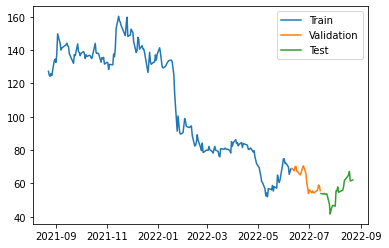

In [136]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 91ms/step - loss: 13005.7031 - mean_absolute_error: 109.4946 - val_loss: 3796.7432 - val_mean_absolute_error: 61.3062
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 12916.1416 - mean_absolute_error: 109.0905 - val_loss: 3743.8643 - val_mean_absolute_error: 60.8734
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 12807.7529 - mean_absolute_error: 108.5931 - val_loss: 3670.8840 - val_mean_absolute_error: 60.2704
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 12667.6318 - mean_absolute_error: 107.9356 - val_loss: 3571.2876 - val_mean_absolute_error: 59.4376
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 12471.5312 - mean_absolute_error: 107.0304 - val_loss: 3438.6418 - val_mean_absolute_error: 58.3091
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 12209.4082 - mean_absolute_error: 105.7812 - val_loss: 3252.0959 - val_

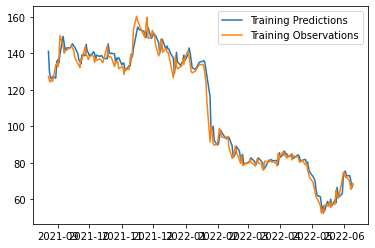

In [138]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

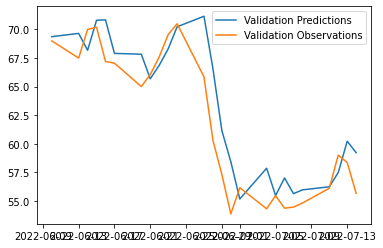

In [139]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

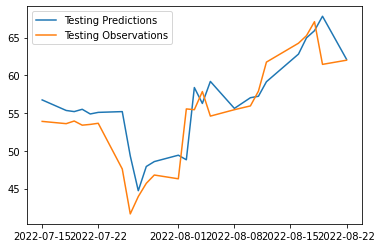

In [140]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

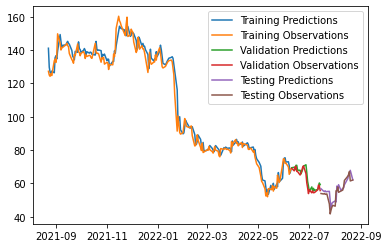

In [141]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [142]:
test_predictions

array([56.74208 , 55.34614 , 55.19676 , 55.50251 , 54.883125, 55.09345 ,
       55.194805, 49.324898, 44.723667, 47.927822, 48.578438, 49.42223 ,
       48.819374, 58.38206 , 56.277126, 59.191494, 55.62138 , 57.034435,
       57.22624 , 59.1522  , 62.80946 , 64.96191 , 65.91    , 67.82158 ,
       62.122463], dtype=float32)

In [143]:
y_test

array([53.9 , 53.6 , 53.95, 53.4 , 53.5 , 53.65, 47.6 , 41.65, 43.95,
       45.7 , 46.8 , 46.3 , 55.55, 55.45, 57.85, 54.6 , 55.45, 55.95,
       57.9 , 61.75, 64.25, 65.25, 67.1 , 61.45, 62.  ], dtype=float32)

In [144]:
print(np.concatenate((test_predictions.reshape(len(test_predictions),1),y_test.reshape(len(y_test),1)),1))

[[56.74208  53.9     ]
 [55.34614  53.6     ]
 [55.19676  53.95    ]
 [55.50251  53.4     ]
 [54.883125 53.5     ]
 [55.09345  53.65    ]
 [55.194805 47.6     ]
 [49.324898 41.65    ]
 [44.723667 43.95    ]
 [47.927822 45.7     ]
 [48.578438 46.8     ]
 [49.42223  46.3     ]
 [48.819374 55.55    ]
 [58.38206  55.45    ]
 [56.277126 57.85    ]
 [59.191494 54.6     ]
 [55.62138  55.45    ]
 [57.034435 55.95    ]
 [57.22624  57.9     ]
 [59.1522   61.75    ]
 [62.80946  64.25    ]
 [64.96191  65.25    ]
 [65.91     67.1     ]
 [67.82158  61.45    ]
 [62.122463 62.      ]]


In [145]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error = ",mean_absolute_error(y_test,test_predictions))

Mean Absolute Error =  2.548121


In [146]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error = ",mean_squared_error(y_test,test_predictions))

Mean Squared Error =  11.448167


In [147]:
print("Root Mean Squared Error = ",np.sqrt(mean_squared_error(y_test,test_predictions)))

Root Mean Squared Error =  3.383514


In [148]:
df['Close'].mean()

102.01282530855019

**Error Rate**

In [149]:
(2.548121/102.01282530855019)*100

2.4978437684603856